In [1]:
"""
三维多边形重力正演
"""

# 3rd imports
import matplotlib.pyplot as plt
# local imports
from geoist import gridder
from geoist.inversion import geometry
from geoist.pfm import polyprism
from geoist.vis import giplt

In [2]:
#模型设置
bounds = [-10000, 10000, -10000, 10000, 0, 5000]
area = bounds[:4]
depths = [0, 1000, 2000, 3000, 4000]
model = []

for i in range(1, len(depths)):
    #axes = plt.figure().gca()
    #plt.axis('scaled')
    #for p in model:
    #    giplt.polygon(p, '.-k', xy2ne=True)
    verts = [[-5000, -3000], [-5000, 4000], [5000, 3000], [2000, -5000]]
    model.append(
        geometry.PolygonalPrism(
            #giplt.draw_polygon(area, axes, xy2ne=True),
            verts,
            depths[i - 1], depths[i], {'density': 500}))

In [3]:
# 计算重力效应
shape = (100, 100)
xp, yp, zp = gridder.regular(area, shape, z=-1)
gz = polyprism.gz(xp, yp, zp, model)

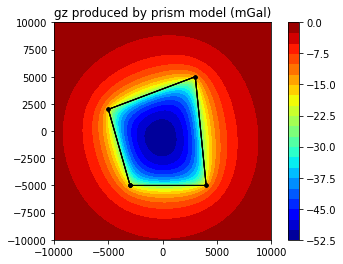

In [4]:
# 画图
plt.figure()
plt.axis('scaled')
plt.title("gz produced by prism model (mGal)")
giplt.contourf(yp, xp, gz, shape, 20)
plt.colorbar()
for p in model:
    giplt.polygon(p, '.-k', xy2ne=True)
giplt.set_area(area)
plt.show()